# Pymaceuticals Inc. 

#### Analysis

Using the data provided, treatments with the lowesting ending tumor volumes are Capomulin and Ramicane. These two regimens also had the most observed timepoints in the study. This is also supported by the means and medians of the data, where both mentioned treatments had significantly lower means and medians of tumor volumes than the other eight.     
Looking further at the means and medians, the seven out of ten treatments display the medians lower than the mean of the data. This data likely has a few high outliers in the data that could be looked at closer when determining the best treatments. As tumor volume goes up by tumor weight, seen in the last graph, the distribution of weight of mice across the drug treatments could be evaluated to see if that is affecting the results of the tumor voulmes.  

Looking between Ramicane and Capomulin, Ramicane has the closest mean and median, only a .45 difference. This treatment has a very similar interquartile range to Capomulin but due to its lower variance and standard deviation in the data set could actually be the best drug treatment in this study. 


In [93]:
# import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import numpy as np

In [94]:
# get data files 
mouse_filepath = "data/Mouse_metadata.csv"
study_filepath = "data/Study_results.csv"

# read and assign data files 
mouse_df = pd.read_csv(mouse_filepath)
study_df = pd.read_csv(study_filepath)

# merge into complete dataframe 
starter_df = pd.merge(study_df, mouse_df, on = "Mouse ID", how = "left")

#display new dataframe for preview
starter_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [95]:
# check for nulls and lets look at some cleaning 
starter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [96]:
starter_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [97]:
# change column titles to non special characters for dot notation
starter_df.columns = [x.lower().replace(" ", "_") for x in starter_df.columns]
#starter_df.columns
# rename tumor_volume_(mm3) and weight_(g)
starter_df.rename(columns={"tumor_volume_(mm3)": "tumor_volume", "weight_(g)": "weight"}, inplace=True)
starter_df.columns

Index(['mouse_id', 'timepoint', 'tumor_volume', 'metastatic_sites',
       'drug_regimen', 'sex', 'age_months', 'weight'],
      dtype='object')

In [98]:
# show number of mice in new merged data
starter_df.mouse_id.nunique()

249

In [99]:
starter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mouse_id          1893 non-null   object 
 1   timepoint         1893 non-null   int64  
 2   tumor_volume      1893 non-null   float64
 3   metastatic_sites  1893 non-null   int64  
 4   drug_regimen      1893 non-null   object 
 5   sex               1893 non-null   object 
 6   age_months        1893 non-null   int64  
 7   weight            1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [100]:
# remove duplicate mice ids in data 
# create mask to look for dupes removed after subset: , keep="first"  after mouse id: , "timepoint"])]["mouse_id"]
duplicates = starter_df[starter_df.duplicated(subset=["mouse_id", "timepoint"])]["mouse_id"]

duplicates_mouse_id = duplicates.unique()
duplicates_mouse_id


array(['g989'], dtype=object)

In [101]:
# display clean data frame with no duplicates
#df = starter_df[~starter_df["mouse_id"].isin(duplicates_mouse_id)].reset_index(drop=True)
df = starter_df.loc[starter_df["mouse_id"] != "g989"]
df 

,mouse_id,timepoint,tumor_volume,metastatic_sites,drug_regimen,sex,age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [102]:
#check for number of mice in clean data frame
df.mouse_id.nunique()

248

## Summary Statistics

In [103]:
# find mean of data
mean_tumor_volume = df.groupby("drug_regimen")["tumor_volume"].mean().astype(float)
mean_tumor_volume

drug_regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: tumor_volume, dtype: float64

In [104]:
# find median of data
median_tumor_volume = df.groupby("drug_regimen")["tumor_volume"].median().astype(float)
median_tumor_volume

drug_regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: tumor_volume, dtype: float64

In [105]:
# find variance of data
variance_tumor_volume = df.groupby("drug_regimen")["tumor_volume"].var().astype(float)
variance_tumor_volume

drug_regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: tumor_volume, dtype: float64

In [106]:
# find standard deviation of data 
sd_tumor_volume = df.groupby("drug_regimen")["tumor_volume"].std().astype(float)
sd_tumor_volume

drug_regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: tumor_volume, dtype: float64

In [107]:
# find SEM of data
sem_tumor_volume = df.groupby("drug_regimen")["tumor_volume"].sem().astype(float)
sem_tumor_volume 

drug_regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: tumor_volume, dtype: float64

In [108]:
# create dataframe with calculated results
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                              "Median Tumor Volume": median_tumor_volume,
                              "Tumor Volume Variance": variance_tumor_volume,
                              "Tumor Volume Std. Dev.": sd_tumor_volume,
                              "Tumor Volume Std. Err.": sem_tumor_volume})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

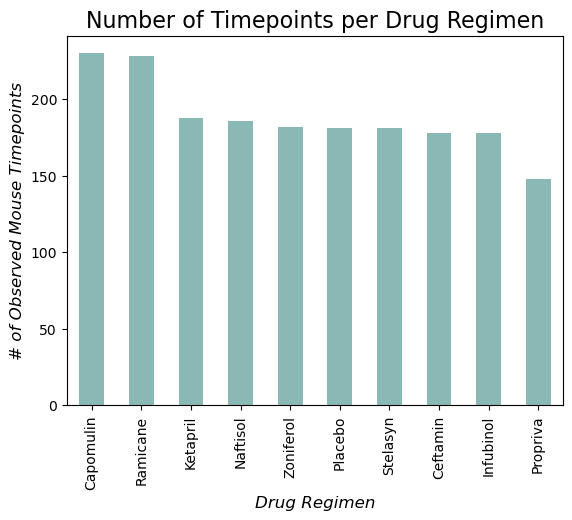

In [109]:
# Bar chart 1 mouse id and time points - using pandas 
#find counts grouped by drug regimens
drug_timepoints = df.groupby("drug_regimen")["timepoint"].count()
sorted_drug_timepoints = drug_timepoints.sort_values(ascending=False)

# create canvas
sorted_drug_timepoints.plot.bar(x="drug_regimen", y="timepoint", color="#8AB9B5")

#label
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic")
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.title("Number of Timepoints per Drug Regimen", fontsize=16)


plt.show()

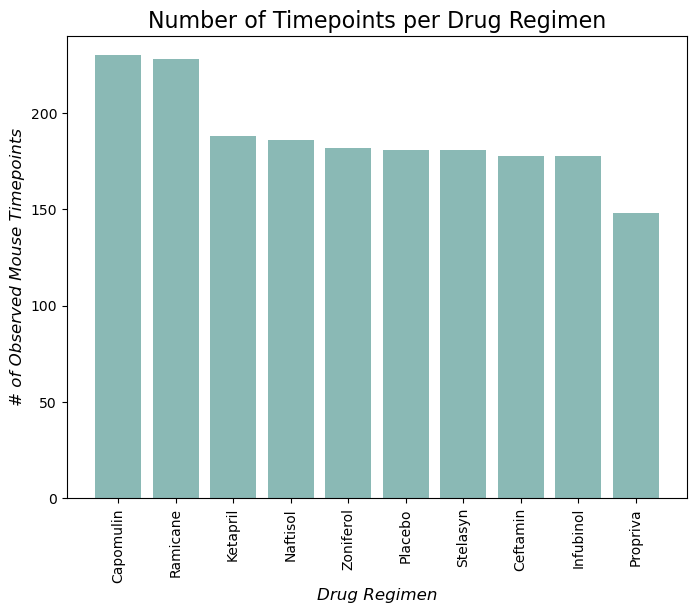

In [110]:
# Bar chart 2 mouse id and time points- using matplotlib
#set vairables 
drug_reg = df.groupby("drug_regimen")["timepoint"].count()
sorted_drug_reg = drug_reg.sort_values(ascending=False)

# create canvass
plt.figure(figsize=(8,6))
plt.bar(sorted_drug_reg.index, sorted_drug_reg.values, color="#8AB9B5")

# customize
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic")
plt.title("Number of Timepoints per Drug Regimen", fontsize=16)
plt.xticks(rotation=90)

plt.ylim(0, 240)

# show
plt.show()

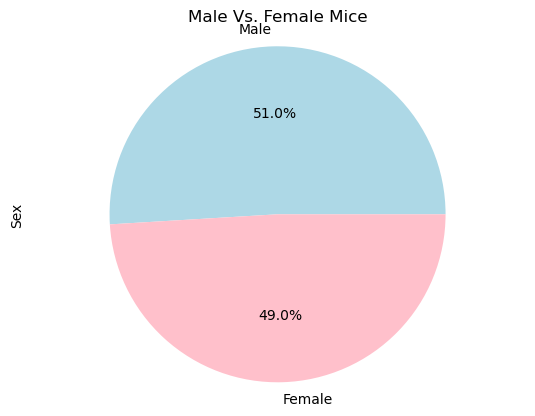

In [111]:
#create Pie plot showing the distribution of female vs male mice - using pandas

# get data to plot
sex_counts = df['sex'].value_counts()

# create canvas 
sex_counts.plot(kind="pie", colors = ["lightblue", "pink"], autopct="%1.1f%%", startangle=0, title="Male Vs. Female Mice", ylabel="Sex")

# show
plt.axis("equal")
plt.show()

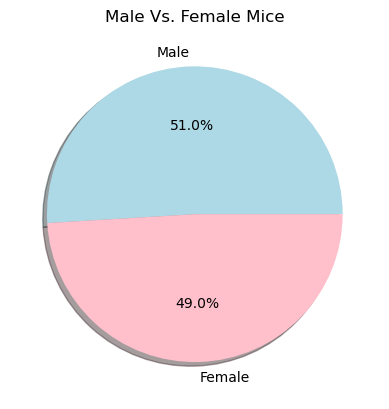

In [112]:
#create Pie plot showing the distribution of female vs male mice - using matplotlib
# get data to plot
sex_counts = df['sex'].value_counts()
labels = ["Male", "Female"]
sizes = sex_counts.values

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

#create canvas
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0, shadow=True)
plt.title("Male Vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [113]:
# using these 4 drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin fisrt find the last timepoint for each mouse 
# as this row will contain the final tumor volumn
final_timepoint = df.groupby('mouse_id')['timepoint'].max().reset_index()
final_timepoint

# merge this last timepoint dataframe for each mouse data with the cleaned df, droping all other rows to have a data frame
# of only the final results for each mouse
ending_df = pd.merge(df, final_timepoint, on=["mouse_id", "timepoint"], how="inner")
ending_df

,mouse_id,timepoint,tumor_volume,metastatic_sites,drug_regimen,sex,age_months,weight
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [114]:
# get 4 treatments into a list by usings smallest tumor volume at end of trial to identify best treatment
top_regimens = ending_df.groupby('drug_regimen')['tumor_volume'].max().nsmallest(4).index
top_regimens

# create the empty lists for final tumor data for plots
capomulin_volume = []
ramicane_volume = []
infubinol_volume = []
ceftamin_volume = []

# find all final volumes for the 4 treatments
final_volumes = ending_df[ending_df["drug_regimen"].isin(top_regimens)]
final_volumes
# enter the drug specific data into the lists for ploting and analysis using for loop to move through ending results and return indivigual regimen data
for regimen in top_regimens:
    top_treatments = ending_df[ending_df["drug_regimen"] == regimen]
    # sort per drug
    if regimen == "Capomulin":
        capomulin_volume.extend(top_treatments["tumor_volume"].tolist())
    elif regimen == "Ramicane":
        ramicane_volume.extend(top_treatments["tumor_volume"].tolist())
    elif regimen == "Infubinol":
        infubinol_volume.extend(top_treatments["tumor_volume"].tolist())
    else:
        ceftamin_volume.extend(top_treatments["tumor_volume"].tolist())

# make into new data frame for box plot
best_results = pd.DataFrame({
    "Capomulin": capomulin_volume,
    "Ramicane": ramicane_volume,
    "Infubinol": infubinol_volume,
    "Ceftamin": ceftamin_volume
})

In [115]:
# Calculate the IQR and find outliers with a for loop using mean and s.d of each list
quartiles_found = []

# using a for loop check for quartiles and outliers for each drug 
for drug in best_results.columns:
    volume_per_drug = best_results[drug]
    quartiles = volume_per_drug.quantile([.25,.75])
    lower_q = quartiles.loc[0.25]
    upper_q = quartiles.loc[0.75]
    iqr = upper_q - lower_q
    # check for outliers assuming anything less than or greater than 1.5 of the iqr is a outlier
    low_outliers_bar = lower_q - (1.5*iqr)
    high_outliers_bar = upper_q + (1.5*iqr)
    outliers = best_results[(best_results[drug] < low_outliers_bar) | (best_results[drug] > high_outliers_bar)][drug]
     
    # store quartiles in new data frame 
    quartiles_df = pd.DataFrame({
        "Drug Regimen": [drug],
        "Lower Quartile": [lower_q],
        "Upper Quartile": [upper_q],
        "IQR": [iqr],
        "Outliers": [outliers],
    })

    quartiles_found.append(quartiles_df)
    
quartiles_found_list = pd.concat(quartiles_found, ignore_index=True) 
quartiles_found_list


,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Outliers
0,Capomulin,32.377357,40.159220,7.781863,"Series([], Name: Capomulin, dtype: float64)"
1,Ramicane,31.560470,40.659006,9.098537,"Series([], Name: Ramicane, dtype: float64)"
2,Infubinol,54.048608,65.525743,11.477135,"0 36.321346 Name: Infubinol, dtype: float64"
3,Ceftamin,48.722078,64.299830,15.577752,"Series([], Name: Ceftamin, dtype: float64)"


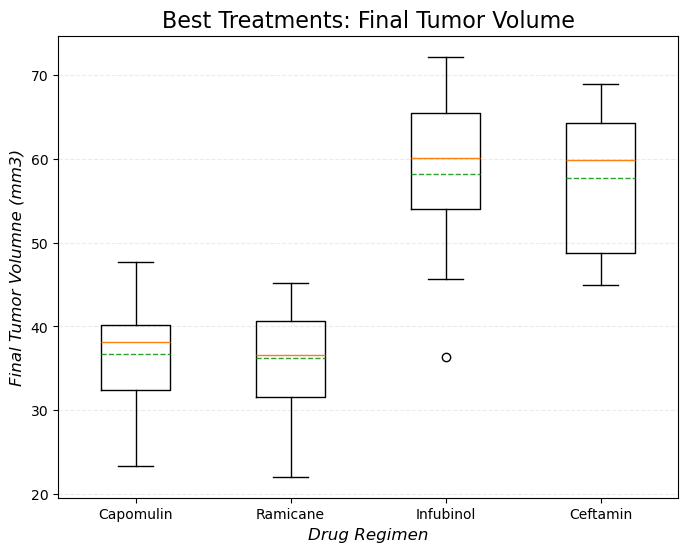

In [116]:
#create a box plot with the top 4 regimen's data
# get data
x = best_results
labels = best_results.columns

# create canvas
plt.figure(figsize=(8, 6))
plt.boxplot(x, meanline=True, showmeans=True)

# customize
plt.xlabel("Drug Regimen", fontstyle="italic", fontsize=12)
plt.ylabel("Final Tumor Volumne (mm3)", fontstyle="italic", fontsize=12)
plt.title("Best Treatments: Final Tumor Volume", fontsize=16)
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.45)

# show
plt.show()

In [117]:
df.columns

Index(['mouse_id', 'timepoint', 'tumor_volume', 'metastatic_sites',
       'drug_regimen', 'sex', 'age_months', 'weight'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

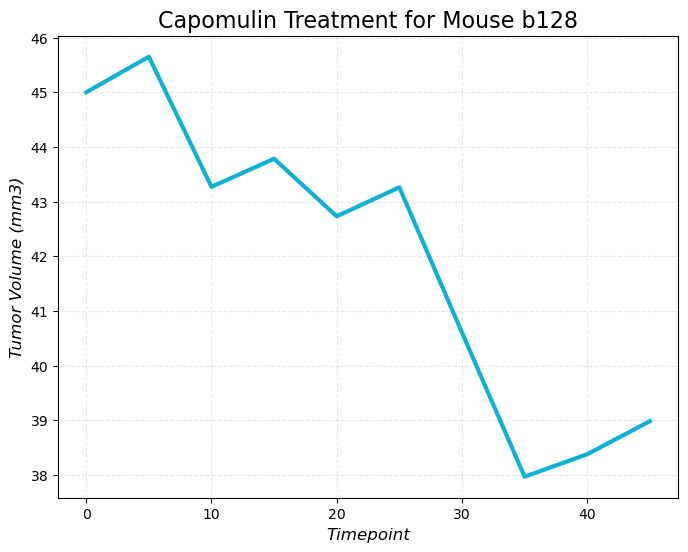

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# find the mouse id to use from df and it's data
regimen = "Capomulin"
sorted_by_capomulin = df[df["drug_regimen"] == regimen]
mouse = sorted_by_capomulin.iloc[0]
mouseid = mouse["mouse_id"]
mouse_data = df[df["mouse_id"] == mouseid]

# make graph
plt.figure(figsize=(8, 6))

# create canvas
x_axis = mouse_data["timepoint"]
y_axis = mouse_data["tumor_volume"]
plt.plot(x_axis, y_axis, color="#0EB1D2", linewidth=3)

# customize and style
plt.xlabel("Timepoint", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Capomulin Treatment for Mouse b128", fontsize=16)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# show 
plt.show

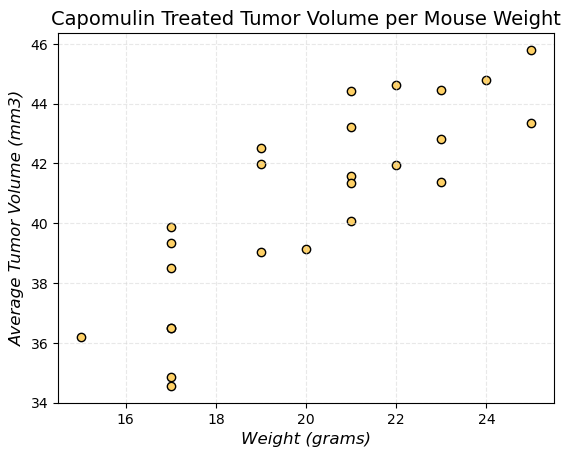

In [119]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"
sorted_by_capomulin = df[df["drug_regimen"] == regimen]
weight_per_capomulin = sorted_by_capomulin.groupby("mouse_id")["weight"].mean().reset_index()
tumor_volume_per_capomulin = sorted_by_capomulin.groupby("mouse_id")["tumor_volume"].mean().reset_index()

weights = weight_per_capomulin["weight"]
volumes = tumor_volume_per_capomulin["tumor_volume"]

# create canvas
plt.scatter(weights, volumes, color="#FFD166", edgecolors='black')

# customize and style
plt.xlabel("Weight (grams)", fontsize=12, fontstyle="italic")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Capomulin Treated Tumor Volume per Mouse Weight", fontsize=14)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

plt.show()

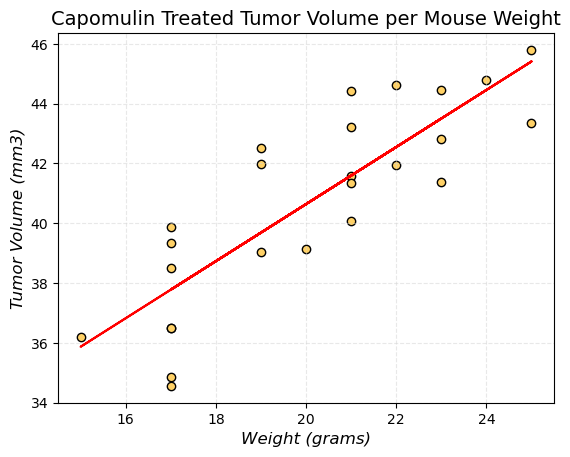

In [120]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

regimen = "Capomulin"
sorted_by_capomulin = df[df["drug_regimen"] == regimen]

# means of weight and tumor volume of data in capomulin
weight_per_capomulin = sorted_by_capomulin.groupby("mouse_id")["weight"].mean().reset_index()
tumor_volume_per_capomulin = sorted_by_capomulin.groupby("mouse_id")["tumor_volume"].mean().reset_index()

# get values themselves for ploting
weights = weight_per_capomulin["weight"]
volumes = tumor_volume_per_capomulin["tumor_volume"]

# create canvass
plt.scatter(weights, volumes, color="#FFD166", edgecolors='black')

# use linear regression
slope, intercept, r_value, p_value, std_err = linregress(weights, volumes)
regression_line = slope * weights + intercept

# lineofbestfit
plt.plot(weights, regression_line, color="red", label="Regression Line")
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# customize
plt.xlabel("Weight (grams)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Capomulin Treated Tumor Volume per Mouse Weight", fontsize=14)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# show
plt.show()


